In [1]:
import tensorflow 
from tensorflow.keras import layers,datasets,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

In [3]:
x_train=x_train/255.0
x_test=x_test/255.0

In [4]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [5]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation="softmax")])

C:\Users\harsh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [7]:
hist=model.fit(x_train,y_train,epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8843 - loss: 0.3715 - val_accuracy: 0.9840 - val_loss: 0.0548
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9820 - loss: 0.0578 - val_accuracy: 0.9878 - val_loss: 0.0360
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9883 - loss: 0.0384 - val_accuracy: 0.9863 - val_loss: 0.0386
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9922 - loss: 0.0264 - val_accuracy: 0.9900 - val_loss: 0.0302
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9936 - loss: 0.0197 - val_accuracy: 0.9900 - val_loss: 0.0321
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9958 - loss: 0.0141 - val_accuracy: 0.9896 - val_loss: 0.0354
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9957 - loss: 0.0132 - val_accuracy: 0.9906 - val_loss: 0.0336
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9963 - loss: 0.011

In [42]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print(f" Test Accuracy: {test_acc*100:.4f}")

313/313 - 0s - 2ms/step - accuracy: 0.9899 - loss: 0.0435
 Test Accuracy: 98.9900


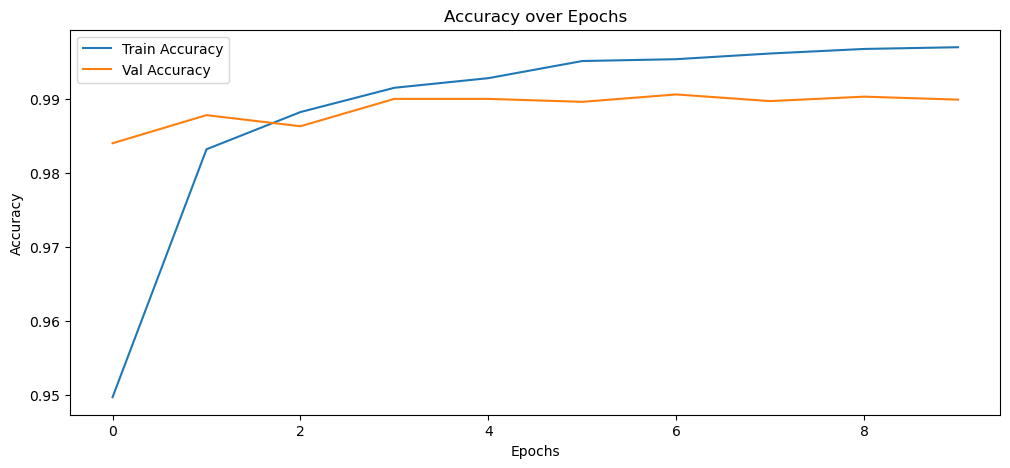

In [44]:
# 6. Plot training & validation accuracy/loss
plt.figure(figsize=(12,5))

# Accuracy plot
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

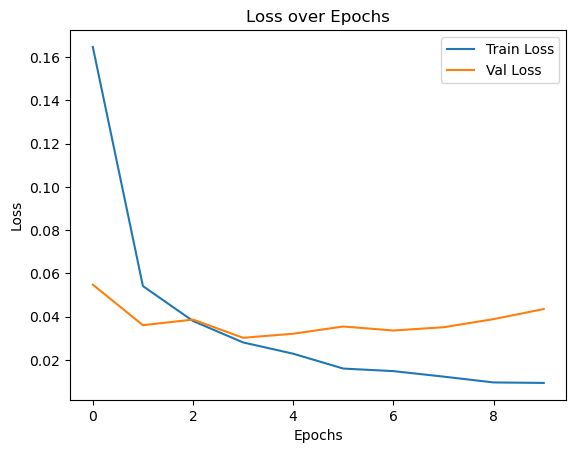

In [50]:
# Loss plot
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


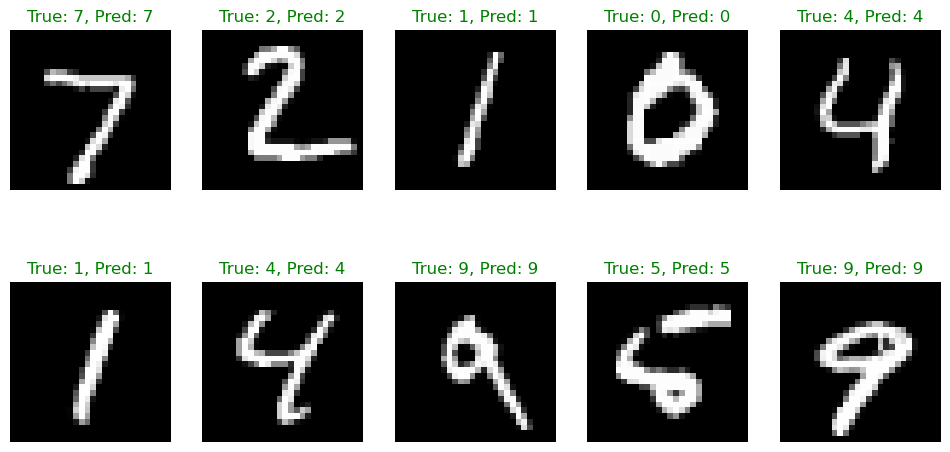

In [52]:
# 7. Show predictions on sample test images
predictions = model.predict(x_test)

plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    true_label = y_test[i]
    pred_label = np.argmax(predictions[i])
    plt.title(f"True: {true_label}, Pred: {pred_label}",
              color=("green" if true_label==pred_label else "red"))
    plt.axis('off')

plt.show()